# Projeto 4 - Analise de folhas de videira

###Entrega
O projeto deve ser entregue até a terça-feira da 5ª semana de aula, envie o link do GitHub ou HTML na atividade no Moodle.
O prazo máximo é quarta-feira da 5ª semana de aula, valendo 20% a menos da nota.
###Dados do Certificado
 - Linguagem: Python
 - Tecnologias: Pandas, Numpy, Tensorflow, Keras, PIL, Matplotlib e Sklearn
 - Carga horária: 20 horas

##Sobre este projeto
Os principais pontos que serão avaliados:
 - Levantamento de hipóteses
 - Manipulação de imagens
 - Criar um modelo de classificação


##Preparação do ambiente
Faça o download e carregue o dataset Grapevine Leaves Image Dataset.

In [ ]:
import os
import numpy as np 
import pandas as pd 
from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.models import Sequential, Model
from keras.applications.imagenet_utils import preprocess_input
from keras.applications.vgg19 import VGG19
from keras.applications.resnet import ResNet50
from keras import regularizers, optimizers
from sklearn.model_selection import train_test_split
from google.colab import drive
from PIL import Image
import cv2


In [ ]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
labels = ['Ak', 'Ala_Idris', 'Buzgulu', 'Dimnit', 'Nazli']
base_dir = '/content/drive/MyDrive/Colab Notebooks/Grapevine_Leaves_Image_Dataset'

print(os.listdir(base_dir))

['Grapevine_Leaves_Image_Dataset_Citation_Request.txt', 'Dimnit', 'Nazli', 'Ala_Idris', 'Ak', 'Buzgulu']


##Exercícios


###Questão 1) Implemente uma rotina de carregamento das imagens (2 pontos)

In [ ]:
path = []
label = []

for grape_class in os.listdir(base_dir):
    label_path = os.path.join(base_dir,grape_class)
    if grape_class in labels:
        for img in os.listdir(label_path):
            path.append(os.path.join(label_path, img))
            label.append(grape_class)

In [ ]:
path = pd.Series(path)
labels = pd.Series(label)
img_data = pd.DataFrame({'Path':path.values, 'Label':labels.values})

In [ ]:
img_data.head()

,Path,Label
0,/content/drive/MyDrive/Colab Notebooks/Grapevi...,Dimnit
1,/content/drive/MyDrive/Colab Notebooks/Grapevi...,Dimnit
2,/content/drive/MyDrive/Colab Notebooks/Grapevi...,Dimnit
3,/content/drive/MyDrive/Colab Notebooks/Grapevi...,Dimnit
4,/content/drive/MyDrive/Colab Notebooks/Grapevi...,Dimnit


In [ ]:
from keras_preprocessing.image.utils import load_img
imagem = []
for chave,elemento in enumerate(path) :
  imagem.append(load_img(elemento))


In [ ]:
imagem = np.array(imagem)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The input object of type 'Image' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Image', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


###Questão 2) Faça a leitura das imagens e responda (2 pontos):


---



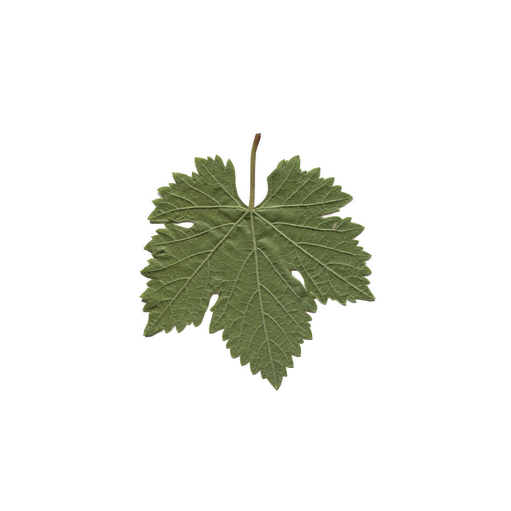

In [ ]:
imagem[1]

####a) Qual a resolução das imagens deste dataset? (0,5 ponto)


In [ ]:
img = Image.open(img_data.Path[0]) 
width = img.width 
height = img.height 
print(f"As dimensões da imagem é de {height} x {width}") 


As dimensões da imagem é de 511 x 511


####b) Quantas imagens por classe? (1,0 ponto)


In [ ]:
img_data.Label.value_counts()

Dimnit       100
Nazli        100
Ala_Idris    100
Ak           100
Buzgulu      100
Name: Label, dtype: int64

####c) Este dataset já está estruturado em conjuntos treinamento/teste ou deve-se adotar alguma metodologia na modelagem? (0,5 ponto)

Não, deve-se adotar uma metodologia que será o train_test_split da biblioteca sklearn.

###Questão 3) Faça a preparação do dataset para extração de características com a CNN VGG-19. Qual o formato do input da rede? Verifique se há necessidade de transformação da imagem e, se sim, implemente esta transformação (1 ponto)

A entrada não deve ser menor que 32, porem será feita transformação das imagens para (224,224,3)

In [ ]:
aux = []
for i in img_data.Path.keys():
  teste = cv2.imread(img_data.Path[i])
  teste = cv2.resize(teste,(224,224))
  aux.append(teste)
 

In [ ]:
aux = np.array(aux)

In [ ]:
aux.shape

(500, 224, 224, 3)

In [ ]:
aux = aux.astype('float32')
aux /= 255

In [ ]:
X = aux.copy()
y = img_data.Label


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10,stratify=y)


In [ ]:
X_train

array([[0.11020333, 0.14751601, 0.7393442 , ..., 0.08194941, 0.3083776 ,
        0.16797674],
       [0.10663944, 0.22576061, 0.8719313 , ..., 0.45409378, 0.45904756,
        0.21849996],
       [0.2479468 , 0.07495898, 0.7544688 , ..., 0.3686563 , 0.371682  ,
        0.19937527],
       ...,
       [0.23498958, 0.15665784, 0.71777636, ..., 0.04986802, 0.37185097,
        0.13611305],
       [0.0438422 , 0.20980851, 0.87232774, ..., 0.3272063 , 0.41345662,
        0.2539826 ],
       [0.13831949, 0.20807643, 0.72187155, ..., 0.1608505 , 0.2716343 ,
        0.11048663]], dtype=float32)

###Questão 4) Implemente o processo de extração de características utilizando a VGG-19 e a transformação deste espaço de característica de forma adequada (2 pontos)

In [ ]:
vgg19 = VGG19(input_shape = (224,224,3), weights = 'imagenet',classes=1000, classifier_activation='softmax')


model_vgg = Model(inputs = vgg19.input, outputs = vgg19.get_layer(index=-2).output)
model_vgg.summary()

574726144/574710816 [==============================] - 4s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [ ]:

prediction = np.array(model_vgg.predict(X_train))
X_train = np.reshape(prediction, (prediction.shape[0], prediction.shape[1]))

prediction = np.array(model_vgg.predict(X_val))
X_val = np.reshape(prediction, (prediction.shape[0], prediction.shape[1]))

print('\tFeatures training shape: ', X_train.shape)
print('\tFeatures testing shape: ', X_val.shape)

	Features training shape:  (400, 4096)
	Features testing shape:  (100, 4096)


###Questão 5) Utilize o espaço de características:

####a) Se o conjunto não estiver particionado, escolha uma técnica e justifique sua decisão. Implemente esta rotina (1 ponto)

O conjunto já encontra-se particionado em 80% para treino e 20% para teste.

####b) Utilize os dados com os classificadores Árvores de Decisão e Naive-Bayes. Obtenha a acurácia dos modelos e avalie os resultados (2 pontos).

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.naive_bayes import GaussianNB

tr = DecisionTreeClassifier().fit(X_train,y_train)
y_pred = tr.predict(X_val)

In [ ]:
accuracy_score(y_pred,y_val)


0.62

In [ ]:
nb = GaussianNB().fit(X_train,y_train)
y_pred_nb = nb.predict(X_val)


In [ ]:
accuracy_score(y_pred_nb,y_val)

0.64

Analisando a acuracia de ambos os modelos obteve-se 59% de acuracia para Arvore de Decisão contra 64% para Naive Bayes, o Naive tende a mostrar um melhor resultado pois a amostra estudada é de pequena quantidade e apesar de ter uma grande profundidade o modelo Naive analisa cada atributo individualmente, diferente da Arvore que analisa para cada ramificação qual atributo tem maior relevancia em toda amostra. 